In [35]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt 
import string 
%matplotlib inline

Загружаем получившийся датасет

In [2]:
Analysis = pd.read_csv('Analysis.csv')
Analysis = Analysis.drop(['Unnamed: 0'], axis = 1)
Analysis.head()

,Name_in,DateTime_in,Found Location,Intake Type,Intake Condition,Animal Type_in,Age upon Intake,DateTime_out,Date of Birth,Outcome Type,Age upon Outcome,Breed_out,Color_out,Gender_in,Sterill_in,Sterill_out,group of age_in,days_of_stay,group of stay
0,1,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,2 years,2019-01-08 15:11:00,2017-01-03 00:00:00,Transfer,2 years,Beagle Mix,Tricolor,Male,1,1,1-3 years,4,0-7 days
1,1,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,8 years,2015-07-05 15:13:00,2007-07-05 00:00:00,Return to Owner,8 years,English Springer Spaniel,White/Liver,Female,1,1,7-9 years,0,0-7 days
2,1,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,11 months,2016-04-21 17:17:00,2015-04-17 00:00:00,Return to Owner,1 year,Basenji Mix,Sable/White,Male,0,1,7-12 months,6,0-7 days
3,0,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,4 weeks,2013-10-21 11:39:00,2013-09-21 00:00:00,Transfer,4 weeks,Domestic Shorthair Mix,Calico,Female,0,0,1-6 weeks,0,0-7 days
4,1,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,4 years,2014-07-02 14:16:00,2010-06-29 00:00:00,Return to Owner,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Male,1,1,4-6 years,3,0-7 days


Разделим датасет на два: один - по собакам, второй - по кошкам

In [3]:
dog = Analysis[Analysis['Animal Type_in'] =='Dog']
cat = Analysis[Analysis['Animal Type_in'] =='Cat']

# Анализ факторов попадания в приют

Количество собак и кошек, попавших в приют

In [6]:
Analysis['Animal Type_in'].value_counts()

Dog    89818
Cat    45134
Name: Animal Type_in, dtype: int64

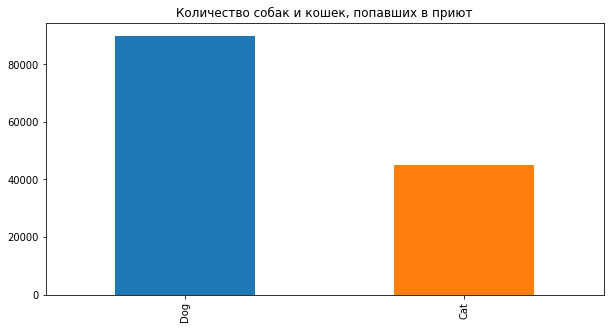

In [7]:
Analysis['Animal Type_in'].value_counts().plot(kind = 'bar', figsize = (10,5), title = 'Количество собак и кошек, попавших в приют')

In [21]:
print ((dog['Animal Type_in'].count()/Analysis['Animal Type_in'].count())* 100, '% собак в приюте')
print ((cat['Animal Type_in'].count()/Analysis['Animal Type_in'].count())* 100, '% кошек в приюте')

66.55551603533108 % собак в приюте
33.44448396466892 % кошек в приюте


Распределение количества собак и кошек по типу попадания в приют

In [23]:
dog['Intake Type'].value_counts()

Stray                 59360
Owner Surrender       20848
Public Assist          9413
Euthanasia Request      197
Name: Intake Type, dtype: int64

In [24]:
cat['Intake Type'].value_counts()

Stray                 34248
Owner Surrender        9753
Public Assist          1066
Euthanasia Request       67
Name: Intake Type, dtype: int64

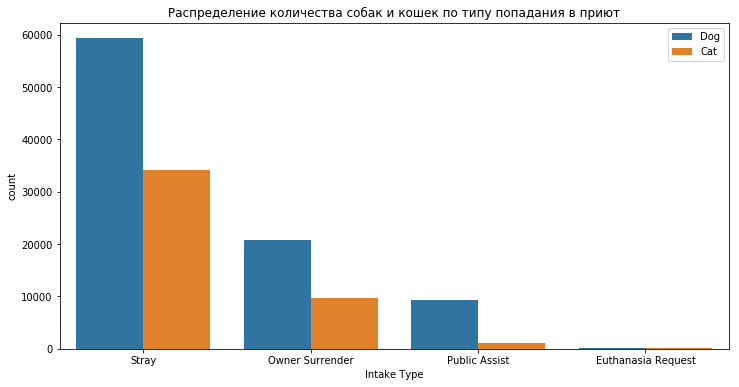

In [37]:
plt.figure (figsize = (12,6))
sns.countplot (data=Analysis, 
x = 'Intake Type',
hue = 'Animal Type_in')
plt.title('Распределение количества собак и кошек по типу попадания в приют')
plt.legend(loc = 'upper right')

In [28]:
#DOGS
dog_int = dog.groupby(['Intake Type'])['Intake Type'].count()

In [31]:
print (dog_int['Stray'].sum() / dog_int.sum() * 100, '% Подобраны с улицы')
print (dog_int['Owner Surrender'].sum() / dog_int.sum() * 100, '% Были сданы владельцем')
print (dog_int['Public Assist'].sum() / dog_int.sum() * 100, '% Принесли волонтеры')
print (dog_int['Euthanasia Request'].sum() / dog_int.sum() * 100, '% Запрос на эвтаназию')

66.08920260972188 % Подобраны с улицы
23.211383018993967 % Были сданы владельцем
10.480081943485715 % Принесли волонтеры
0.21933242779843687 % Запрос на эвтаназию


In [32]:
#CATS
cat_int = cat.groupby(['Intake Type'])['Intake Type'].count()

In [33]:
print (cat_int['Stray'].sum() / cat_int.sum() * 100, '% Подобраны с улицы')
print (cat_int['Owner Surrender'].sum() / cat_int.sum() * 100, '% Были сданы владельцем')
print (cat_int['Public Assist'].sum() / cat_int.sum() * 100, '% Принесли волонтеры')
print (cat_int['Euthanasia Request'].sum() / cat_int.sum() * 100, '% Запрос на эвтаназию')

75.88071077236674 % Подобраны с улицы
21.60898657331502 % Были сданы владельцем
2.361855807152036 % Принесли волонтеры
0.14844684716621617 % Запрос на эвтаназию


Количество особей мужского и женского пола у собак и кошек 

In [38]:
dog['Gender_in'].value_counts()

Male       49503
Female     39909
Unknown      406
Name: Gender_in, dtype: int64

In [39]:
cat['Gender_in'].value_counts()

Female     20972
Male       20478
Unknown     3684
Name: Gender_in, dtype: int64

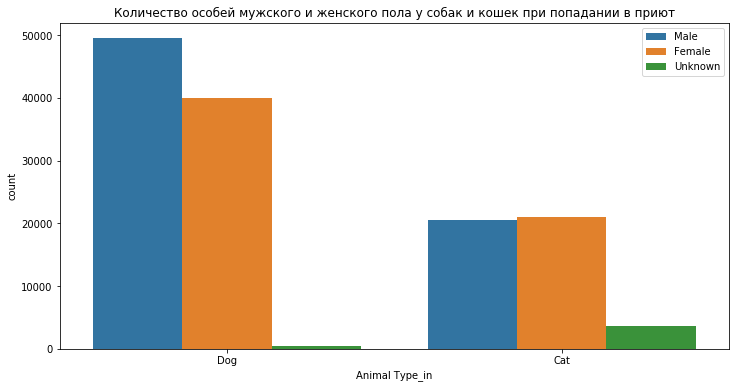

In [42]:
plt.figure (figsize = (12,6))
sns.countplot (data=Analysis, 
x = 'Animal Type_in',
hue = 'Gender_in')
plt.title('Количество особей мужского и женского пола у собак и кошек при попадании в приют')
plt.legend(loc = 'upper right')

In [43]:
dog_f = dog[dog['Gender_in'] =='Female']
dog_m = dog[dog['Gender_in'] =='Male']
cat_f = cat[cat['Gender_in'] =='Female']
cat_m = cat[cat['Gender_in'] =='Male']

In [63]:
print (dog_f['Gender_in'].count()/dog['Animal Type_in'].count() * 100, '% собак женского пола в приюте')
print (dog_m['Gender_in'].count()/dog['Animal Type_in'].count() * 100, '% собак мужского пола в приюте')
print (cat_f['Gender_in'].count()/cat['Animal Type_in'].count() * 100, '% кошек женского пола в приюте')
print (cat_m['Gender_in'].count()/cat['Animal Type_in'].count() * 100, '% кошек мужского пола в приюте')

44.4331871117148 % собак женского пола в приюте
55.11478768175644 % собак мужского пола в приюте
46.46607878761023 % кошек женского пола в приюте
45.37156024283245 % кошек мужского пола в приюте


Соотношение пола собак и кошек по типу попадания в приют